In [1]:
from konlpy.tag import Okt
import re
okt=Okt()
token=re.sub("[.!#~]","", '비가 오니 마음이 차분해지네요. 요즘 너무 더웠어요. 비가 오니 마음이 기쁘네요.')
# 형태소 분석
token=okt.morphs(token)
word2index={} # 단어 사전(단어와 숫자 인덱스)
bow=[] # 단어 가방(단어와 출현 횟수)
for voca in token:
    #사전에 없는 단어 추가
    if voca not in word2index.keys(): # 새로운 단어
        word2index[voca]=len(word2index)
        # 단어의 인덱스와 출현횟수 (기본값:1)
        bow.insert(len(word2index)-1,1)
    else:
        #재등장하는 단어의 인덱스
        index=word2index.get(voca)
        #단어 카운트 증가
        bow[index]=bow[index]+1
print(word2index)
#단어의 출현 횟수
print(bow)

{'비': 0, '가': 1, '오니': 2, '마음': 3, '이': 4, '차분해지네요': 5, '요즘': 6, '너무': 7, '더웠어요': 8, '기쁘네요': 9}
[2, 2, 2, 2, 2, 1, 1, 1, 1, 1]


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
corpus=[' 모처럼 전국에 비가 내리고 있습니다.'] 
line=['전국에 비가']
vector = CountVectorizer()
vector.fit(corpus)
print(vector.vocabulary_)
print(vector.transform(line).toarray()) #단어의 출현횟수

{'모처럼': 1, '전국에': 4, '비가': 2, '내리고': 0, '있습니다': 3}
[[0 0 1 0 1]]


In [4]:
f=open('c:/data/text/news1.txt')
corpus=f.read()
txt=okt.nouns(corpus)
txt2=[' '.join(txt)]
txt2

['지역 근로자 평균 급여 액 이상 차이 나 것 민주당 김회재 의원 국세청 광역 자치 단체 별 근로 소득 연말정산 신고 현황 주소지 기준 서울 평균 급여 액 전국 평균 개 시도 가운데 두 번 수준 평균 급여 액 가장 지역 공무원 공공기관 종사 행정도시 세종 제조업 도시 울산 은 세종 서울 위 기록 나머지 개 시도 모두 급여 액 못 제주 의 급여 액 가장 전북 인천 강원 대구 부산 순이 또 경북 경남 충북 각각 전남 광주 각각 원 대전 충남 경기 등 세종 제주 급여 액 격차 달 과세 대상 근로 소득 가운데 서울 경기 인천 발생 근로 소득 수도권 집중 년 포인트 서울 거주 자의 급여 액 은 강원 의 배 수준 김 의원 기업 인프라 구직 인구 모두 수도권 지역 소멸 위기 처 수도권 전쟁 경쟁 며 국토 불균형 가장 원인 양질 일자리 지적 양질 일자리 만들기 위해 지역 사제 추진 지역 중소기업 대한 지원 고 강조']

c:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


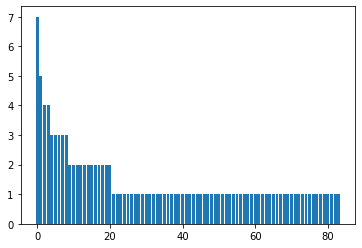

In [5]:
import numpy as np
import matplotlib.pyplot as plt
vect = CountVectorizer().fit(txt2)
#bow의 출현횟수 합계
count = vect.transform(txt2).toarray().sum(axis=0)
idx = np.argsort(-count) #카운트 내림차순 정렬
count = count[idx]
# x축의 단어이름
feature_name = np.array(vect.get_feature_names())[idx]
plt.bar(range(len(count)), count)
plt.show()




In [6]:
list(zip(feature_name, count))

[('급여', 7),
 ('지역', 5),
 ('서울', 4),
 ('평균', 4),
 ('세종', 3),
 ('소득', 3),
 ('수도권', 3),
 ('근로', 3),
 ('가장', 3),
 ('인천', 2),
 ('시도', 2),
 ('수준', 2),
 ('일자리', 2),
 ('제주', 2),
 ('모두', 2),
 ('의원', 2),
 ('양질', 2),
 ('가운데', 2),
 ('각각', 2),
 ('경기', 2),
 ('강원', 2),
 ('국토', 1),
 ('위기', 1),
 ('위해', 1),
 ('이상', 1),
 ('인구', 1),
 ('격차', 1),
 ('인프라', 1),
 ('거주', 1),
 ('자의', 1),
 ('자치', 1),
 ('전국', 1),
 ('전남', 1),
 ('전북', 1),
 ('제조업', 1),
 ('원인', 1),
 ('강조', 1),
 ('종사', 1),
 ('주소지', 1),
 ('중소기업', 1),
 ('지원', 1),
 ('지적', 1),
 ('집중', 1),
 ('차이', 1),
 ('추진', 1),
 ('충남', 1),
 ('충북', 1),
 ('포인트', 1),
 ('전쟁', 1),
 ('울산', 1),
 ('연말정산', 1),
 ('경남', 1),
 ('구직', 1),
 ('근로자', 1),
 ('광주', 1),
 ('기록', 1),
 ('기업', 1),
 ('기준', 1),
 ('김회재', 1),
 ('나머지', 1),
 ('단체', 1),
 ('대구', 1),
 ('대상', 1),
 ('대전', 1),
 ('대한', 1),
 ('도시', 1),
 ('국세청', 1),
 ('만들기', 1),
 ('민주당', 1),
 ('발생', 1),
 ('부산', 1),
 ('불균형', 1),
 ('사제', 1),
 ('과세', 1),
 ('행정도시', 1),
 ('공무원', 1),
 ('소멸', 1),
 ('공공기관', 1),
 ('경쟁', 1),
 ('순이', 1),
 ('경북', 1),
 ('신고

In [7]:
# 불용어 추가
vector = CountVectorizer(stop_words=['더'])
print(vector.fit_transform(txt2).toarray()) 
print(vector.vocabulary_)

[[2 3 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 3 1 7 1 1 1 1 1 1 1 1 1 1 1 1 2 1
  1 1 1 1 4 3 3 1 3 2 1 2 1 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1
  5 1 1 1 1 1 1 1 4 1 1 1]]
{'지역': 72, '근로자': 20, '평균': 80, '급여': 21, '이상': 56, '차이': 76, '민주당': 35, '김회재': 25, '의원': 55, '국세청': 17, '광역': 14, '자치': 62, '단체': 27, '근로': 19, '소득': 42, '연말정산': 50, '신고': 48, '현황': 83, '주소지': 70, '기준': 24, '서울': 40, '전국': 63, '시도': 47, '가운데': 0, '수준': 45, '가장': 1, '공무원': 12, '공공기관': 11, '종사': 69, '행정도시': 82, '세종': 41, '제조업': 67, '도시': 32, '울산': 51, '기록': 22, '나머지': 26, '모두': 34, '제주': 68, '전북': 65, '인천': 58, '강원': 3, '대구': 28, '부산': 37, '순이': 46, '경북': 9, '경남': 8, '충북': 79, '각각': 2, '전남': 64, '광주': 15, '대전': 30, '충남': 78, '경기': 7, '격차': 6, '과세': 13, '대상': 29, '발생': 36, '수도권': 44, '집중': 75, '포인트': 81, '거주': 5, '자의': 61, '기업': 23, '인프라': 59, '구직': 16, '인구': 57, '소멸': 43, '위기': 53, '전쟁': 66, '경쟁': 10, '국토': 18, '불균형': 38, '원인': 52, '양질': 49, '일자리': 60, '지적': 74, '만들기': 33, '위해': 54, '사제': 39, '추진': 77, '중소기업': 71,